<img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-right:10px;width:140px;float:left"></td>
<h2 style="white-space: nowrap">Neural Signal and Signal Processing (NX-421)</h2>
<hr style="clear:both"></hr>
<h1><font color='black'>M/EEG: Introduction and basic analysis</font></h1>

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 0px;'>
<font size = "3">In this lab we will introduce you to the basics of working with electroencephalography (EEG) and magnetoencephalography (MEG) data. We will cover some introductory visualizations and basic analysis techniques like Event related Potentials (ERP) and Power Spectral Density (PSD). </font>

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> M/EEG </b></p>
<p style='text-indent: 0px;'><font size = "3">Electrophysiological neuroimaging explores the relationship between neural activity in the brain and electromagnetic field signals from the brain. This phenomenon is studied using two popular neuroimaging methods based on electromagnetic fields known as electroencephalography (EEG) and magnetoencephalography (MEG) "M/EEG".</font>
<br>
</p></span>
</div>

<br>
<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> MNE </b></p>
<p style='text-indent: 0px;'>
<font size = "3">In this lab tutorial we will use MNE-Python, an open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG,and more. Checkout this <a href="https://www.frontiersin.org/articles/10.3389/fnins.2013.00267/full" target="_blank">paper</a>, to know more what MNE-Python can do!</p></font>

<font size = "3">You can also access the MNE documentation <a href="https://mne.tools/stable/generated/mne.io.Raw.html" target="_blank">here</a></p></font>
    
<font size = "2">Alexandre Gramfort, Martin Luessi, Eric Larson, Denis A. Engemann, Daniel Strohmeier, Christian Brodbeck, Roman Goj, Mainak Jas, Teon Brooks, Lauri Parkkonen, and Matti S. Hämäläinen. MEG and EEG data analysis with MNE-Python. Frontiers in Neuroscience, 7(267):1–13, 2013.</font>
<br>
</p></span>
</div>

In [4]:
# Importing requirements 
import numpy as np
import mne
import os.path as op
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Importing sample dataset from Mmne_dataNE
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating /Users/Matthieu/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 2.73TB/s]
Untarring contents of '/Users/Matthieu/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/Matthieu/mne_data'


Attempting to create new mne-python configuration file:
/Users/Matthieu/.mne/mne-python.json
Download complete in 04m52s (1576.2 MB)
Opening raw data file /Users/Matthieu/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-center: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 2px;'> <font size = "3">By default we already have some basic information about the dataset we are loading. Here, it gives us the information about projections items in the file along with recorded dataset. We will understand them in more detail later. Let's first try to know more simpler details about the loaded dataset.</font>
<br>
</p></span>
</div>

In [5]:
# Extracting information
info = mne.io.read_info(sample_data_raw_file)
print(info)

    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-center: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 0px;'><font size = "3">As you can see, the info object keeps track of a lot of information about the data, recording system and the experiment design. Let's have a look at some the necessary information.
<br> </font>
</p></span>
</div>


In [6]:
# Let's check the sampling rate
print('Sampling rate:', raw.info['sfreq'], 'Hz')

# Check the size of the data matrix
print('%s Channels ' % raw.info['nchan'], '%s Samples' % len(raw.times))

Sampling rate: 150.15374755859375 Hz
376 Channels  41700 Samples


<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-center: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 2px;'> <font size = "3">We now know some basic information about the dataset like sampling rate and total number of channels. Let us now extract the MEG and EEG data from the dataset and create separate data structures for both.</font>
<br>
</p></span>
</div>

In [7]:
# Getting the MEG and EEG data from the raw data object
meg_only = raw.copy().pick_types(meg=True)
eeg_only = raw.copy().pick_types(meg=False, eeg=True)

# Display the data information (channels x samples)
print('%s MEG channels ' % meg_only.info['nchan'], '%s samples' % len(meg_only.times))
print('%s EEG channels ' % eeg_only.info['nchan'], '%s samples' % len(eeg_only.times))

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
305 MEG channels  41700 samples
59 EEG channels  41700 samples


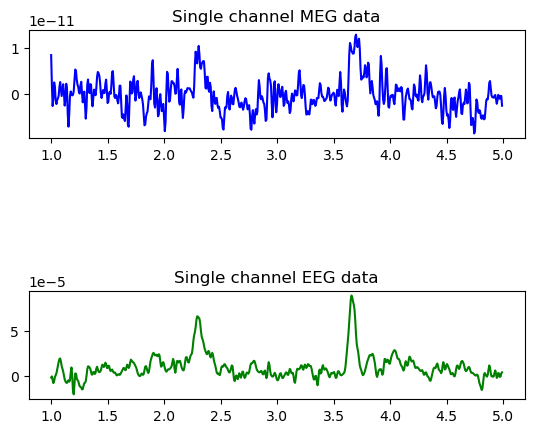

In [8]:
# First, let's visualize a single channel data
# Specify details
sfreq = raw.info['sfreq']
chan_num = 10
start_pt = 1
end_pt = 5

# For MEG data 
data_meg, times_meg = meg_only[chan_num, int(sfreq * start_pt):int(sfreq * end_pt)]

# For EEG data 
data_eeg, times_eeg = eeg_only[chan_num, int(sfreq * start_pt):int(sfreq * end_pt)]

# Plotting
fig = plt.figure()
ax = plt.subplot(311)
ax.set_title("Single channel MEG data")
ax.plot(times_meg, data_meg.T, 'b')

ax = plt.subplot(313)
ax.set_title("Single channel EEG data")
ax.plot(times_eeg, data_eeg.T, 'g')
plt.show()

# Notice the change in the scalings factors for EEG and MEG data

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-center: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 0px;'> <font size = "3">Now that we have some idea what M/EEG looks like at channel level, Let us now have a look at more channels. For this we will use the plotting from MNE library. 
    <br>
    <br>
    Note-You can change the duration and n_channels arguments to play around with the dataset. Also, for more details visit the MNE-Python webpage to learn more about different plotting arguments.
<br> </font>
</p></span>
</div>

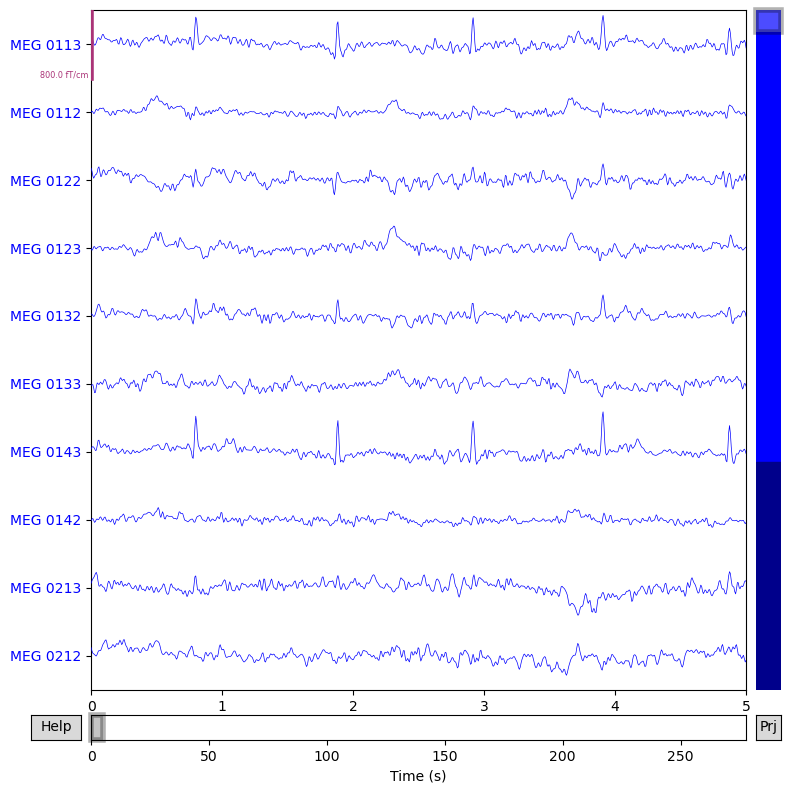

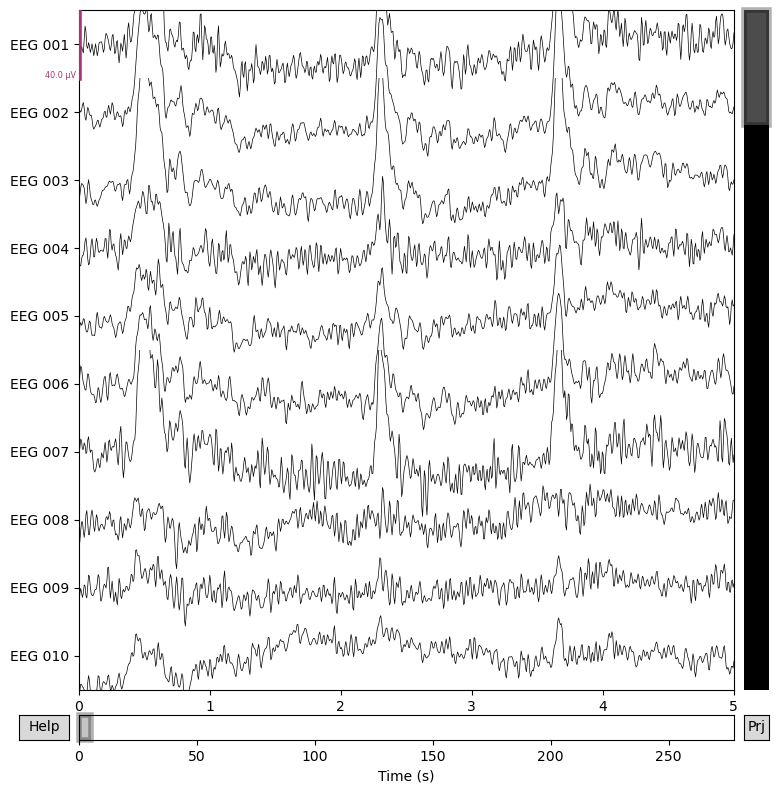

In [11]:
#MEG
plt.ion() 
meg_only.plot(duration=5, n_channels=10)

#EEG
eeg_only.plot(duration=5, n_channels=10)
plt.ioff()

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> Montages </b></p>
<p style='text-indent: 0px;'><font size = "3">In the context of electrophysiological data, montages refer to the sensor positions in 3D (x, y, z in meters), which can be assigned to existing M/EEG data. By specifying the locations of sensors relative to the brain, Montages play an important role in computing the forward solution and inverse estimates of the neural activity.</font>
    
<br>

<p style='text-indent: 0px;'><font size = "3"> Let's have a look at the montage used for the EEG data in the loaded sample dataset and how it is represented in the 2D and 3D space. </font>
</p></span>
</div>

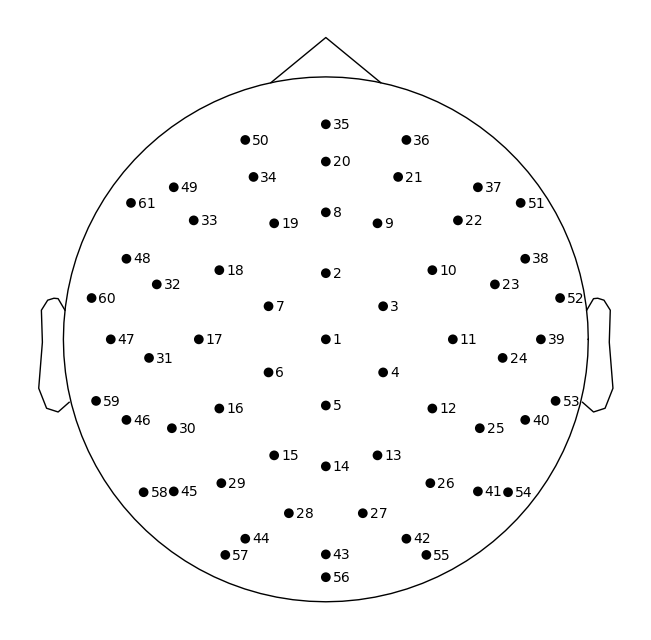

In [12]:
# Loading the montage
easycap_montage = mne.channels.make_standard_montage('easycap-M10')

# 2D visualization 
fig1 = easycap_montage.plot()  # 2D

# 3D visualization 
fig2 = easycap_montage.plot(kind='3d', show=False)  # 3D
#fig2 = fig2.gca().view_init(azim=70, elev=15)

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-center: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 2px;'> <font size = "3"> We now know some qualitative and quantitative information about the sample dataset. Before we go into the next part, let's have a quick understanding of the task and experiment design of this dataset. 
    <br> 
    <br>
    In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face. Six types of stimulus were recorded in the event information for response to visual stimulus (left and right), auditory stimulus (left and right), face stimulus, and button press.</font>
<br>
</p></span>
</div>

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> Epochs  </b></p>
<p style='text-indent: 0px;'><font size = "3"> Epochs are a data structure for representing and analyzing equal-duration chunks of the EEG/MEG signal. Epochs are most often used to represent data that is time-locked to repeated experimental events (such as stimulus onsets or subject button presses), but can also be used for storing sequential or overlapping frames of a continuous signal (e.g., for analysis of resting-state activity) </font>
<br>
<p style='text-indent: 0px;'><font size = "3"> Let's use the in-built MNE functions for extracting events and corresponding epochs from the dataset and visualize them.</font>
</p></span>
</div>

In [13]:
# Loading the raw data again, but cropped for first 120 seconds. 
raw_cropped = mne.io.read_raw_fif(sample_data_raw_file, verbose=False).crop(tmax=120)

# We will only focus on EEG data present in the dataset, so extracting the same in raw_cropped_eeg
raw_cropped_eeg = raw.pick(['eeg', 'eog']).load_data()
#raw_cropped_eeg.info

# Extract the events tagged by the stimulus channel (STI 014) already present in the data
events = mne.find_events(raw_cropped, stim_channel='STI 014')

# Creating an event dictionary. Contains the type of stimulus for each event tagged
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,'visual/right': 4, 'face': 5, 'button': 32}
epochs = mne.Epochs(raw_cropped_eeg, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)
print(epochs.event_id)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
176 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
176 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 176 events and 151 original time points ...
0 bad epochs dropped
{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4, 'face': 5, 'button': 32}


You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


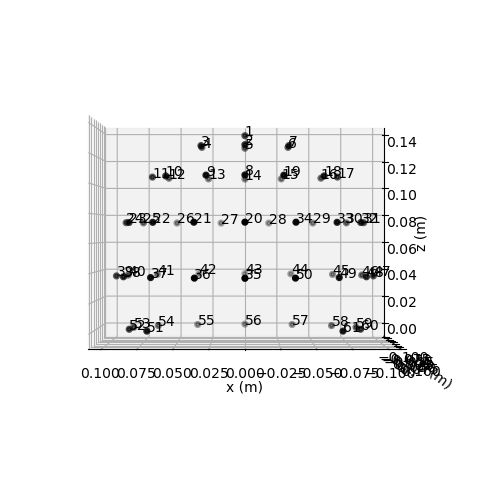

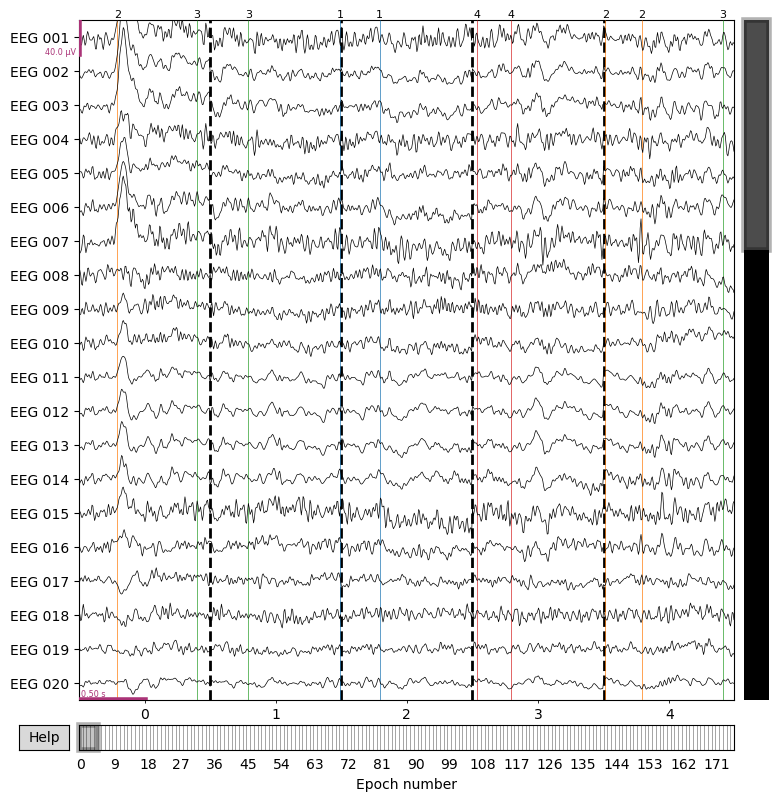

In [14]:
# Let's visualize the first 5 epochs and with their event id 
plt.ion() 
fig_allepochs = epochs.plot(n_epochs=5, events=events)
plt.ioff() 

# Note the duration of each epoch is specified when we extract the epochs as "tmin" and "tmax" arguments). Event
# names(and ids) are specified under "event_id" argument. In this figure, for the first 5 epochs, different events
# are marked with different color with their id indicated on top of the plot.

In [15]:
# Let's now count the number of epochs present in each event category in the loaded dataset 
# (Note- In the "raw_cropped" variable, we only extracted the first 120 seconds of data (tmax = 120). You can modify 
# this and decrease/increase the time duration to plot)

### YOUR CODE
# auditory_left_epochs = 
# auditory_right_epochs = 
# visual_left_epochs = 
# visual_right_epochs = 
# faces_epochs = 
# button_press =

### SOLUTION
faces_epochs =  epochs['face']; print(faces_epochs);

<Epochs | 8 events (all good), -0.3 – 0.699 s (baseline -0.3 – 0 s), ~3.5 MB, data loaded,
 'face': 8>


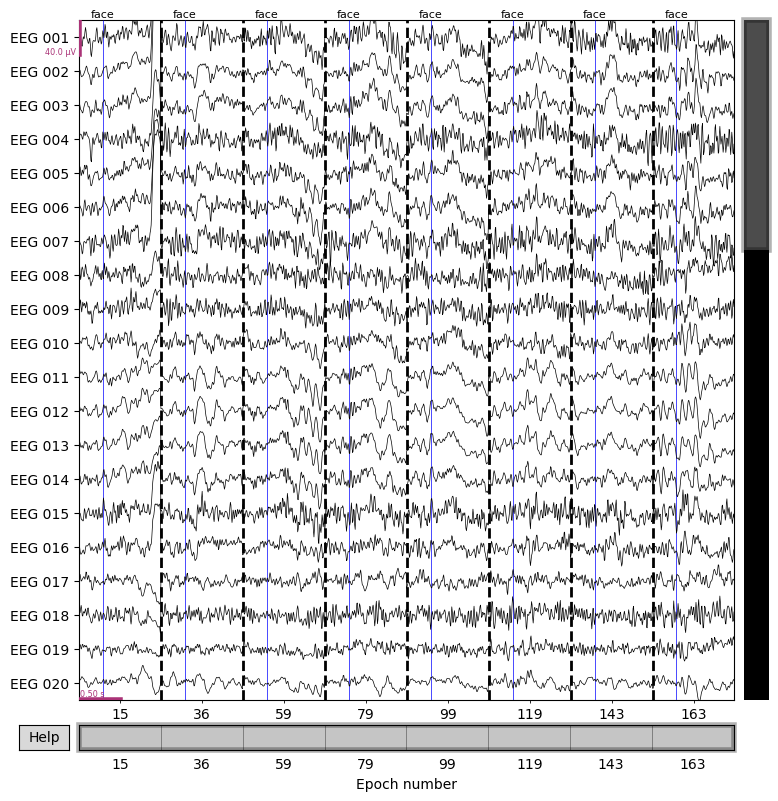

In [16]:
# Now that we now the events present in the dataset and their ids. Let's now try to plot th epochs of only one 
# type of event i.e. face. 

# Make sure to already compute the faces_epochs in the previous cell

plt.ion() 
faces_count = len(faces_epochs) 
catch_faces = mne.pick_events(events, include=[5])
epochs['face'].plot(n_epochs=faces_count, events=catch_faces, event_id=event_dict, event_color=dict(face='blue'))
plt.ioff()

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> Event Related Potential (ERP)  </b></p>
<p style='text-indent: 0px;'><font size = "3"> Event Related Potentials (ERPs) are very small voltages generated in the brain structures in response to specific events or stimuli. They are changes in the M/EEG signal that are time locked to sensory, motor or cognitive events that provide safe and non-invasive approach to study psychophysiological correlates of mental processes. It might also be useful to have quick recap of ERPs from your lecture slides and additionally to know more about what are different types of ERP waveforms from this research article: <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3016705/" target="_blank">Event-related potential: An overview</a></p></font>

<p style='text-indent: 0px;'><font size = "3"> Let's extract and visualize the ERPs for different events from the EEG data in use for this part.</font>
</p></span>
</div>

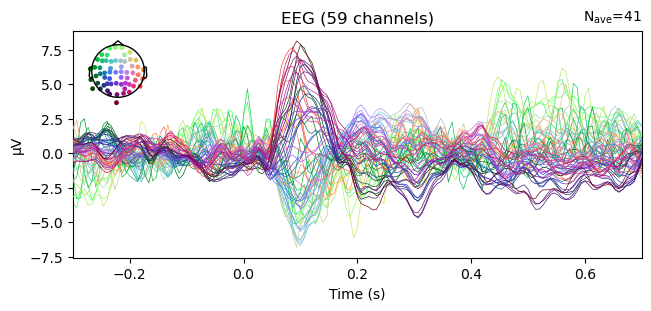

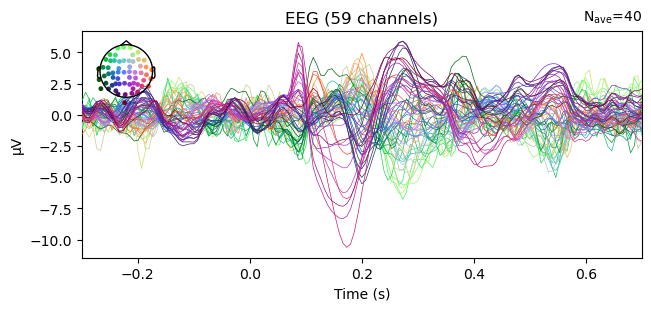

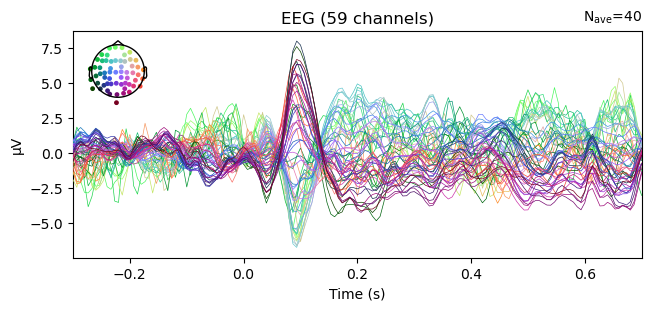

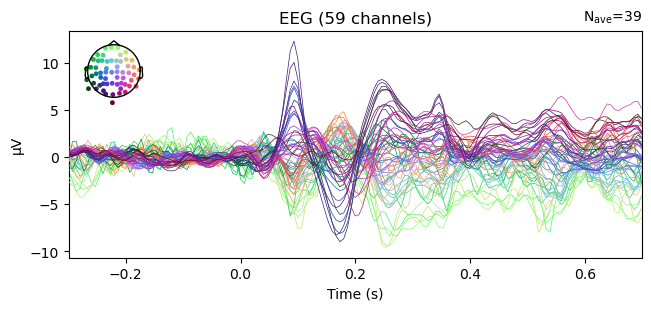

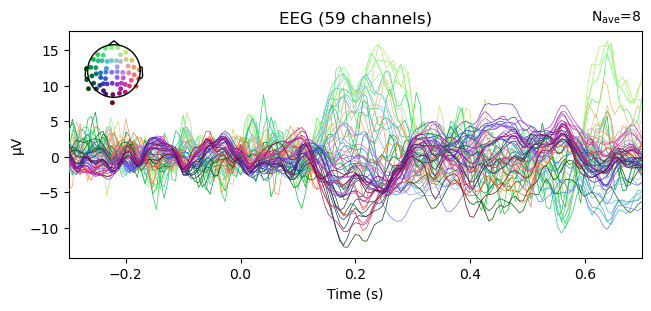

In [17]:
# Extracting and plotting the epochs for auditory(left), visual(left), and faces conditions
#
# Note that for the plot below:
# Time duration = -0.3 to 0.7 (we decided this while extracting the epochs)
# Channels: 59 EEG channels (we are only using the EEG data here, i.e. raw_cropped_eeg )
# N_average = # of extracted epochs for each event type
# Scalp maps (top left) : topography of scalp potentials, color-coded to different channels

l_aud = epochs['auditory/left'].average(); fig_aud = l_aud.plot(spatial_colors=True)
l_vis = epochs['visual/left'].average(); fig_vis = l_vis.plot(spatial_colors=True)

# Plot the ERPs for 'auditory/right', 'visual/right', and 'faces' events
### YOUR CODE

r_aud = epochs['auditory/right'].average(); fig_aud_r = r_aud.plot(spatial_colors=True)
r_vis = epochs['visual/right'].average(); fig_vis_r = r_vis.plot(spatial_colors=True)
face = epochs['face'].average(); fig_face = face.plot(spatial_colors=True)

Projections have already been applied. Setting proj attribute to True.


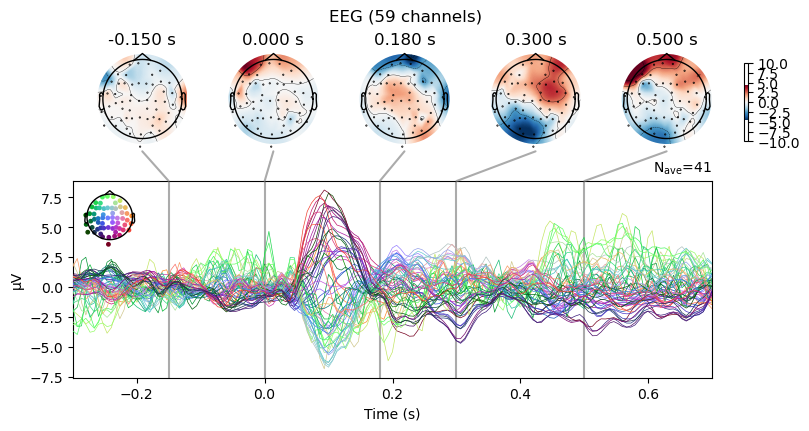

Projections have already been applied. Setting proj attribute to True.


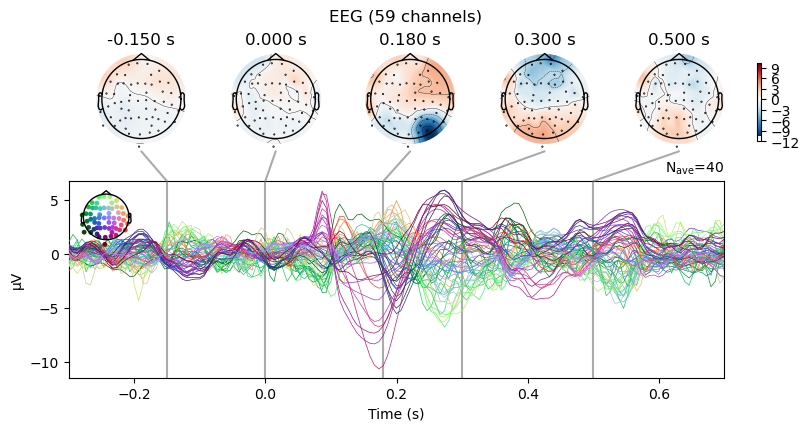

Projections have already been applied. Setting proj attribute to True.


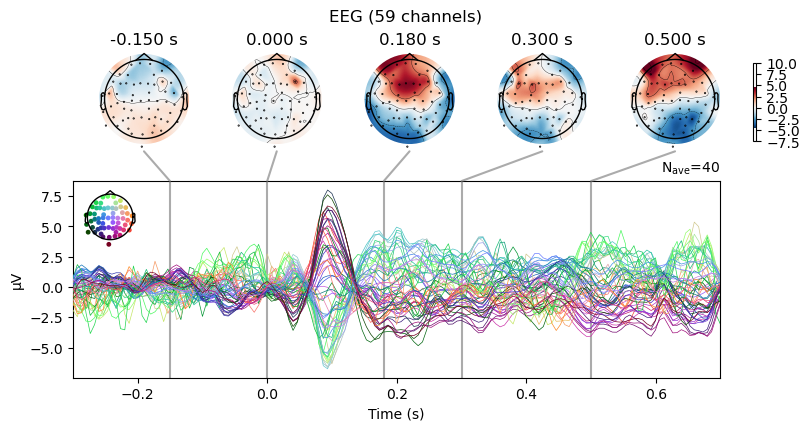

Projections have already been applied. Setting proj attribute to True.


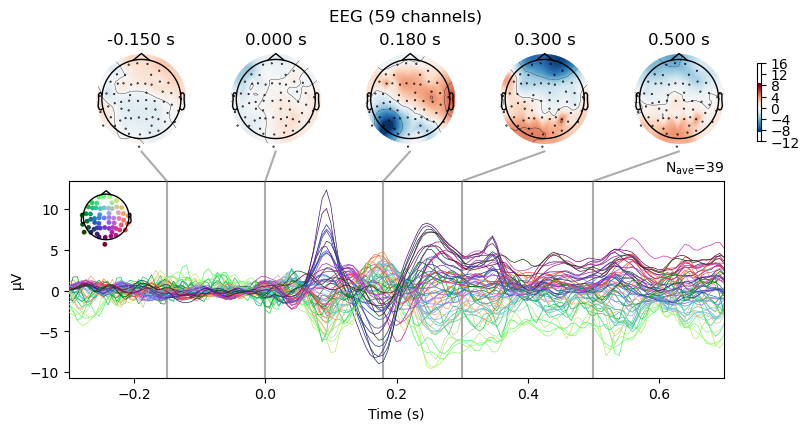

Projections have already been applied. Setting proj attribute to True.


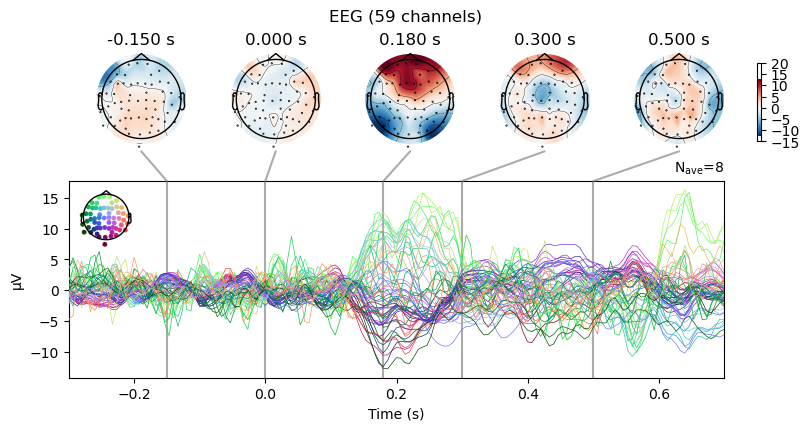

In [18]:
# In ERP analysis we can also visualize the scalp topographies as they vary with time, specifically for baseline, 
# stimulus onset, and post-stimulus period. Here we will use the MNE functionality to visualize the joint ERP and 
# time-specific scalp topographies. 

fig_l_aud_joint = l_aud.plot_joint(times=[-0.15, 0, 0.18, 0.3, 0.5])
fig_l_vis_joint = l_vis.plot_joint(times=[-0.15, 0, 0.18, 0.3, 0.5])

# Plot the joint ERPs-scalp maps for 'auditory/right', 'visual/right', and 'faces' events.

### YOUR CODE
fig_r_aud_joint = r_aud.plot_joint(times=[-0.15, 0, 0.18, 0.3, 0.5])
fig_r_vis_joint = r_vis.plot_joint(times=[-0.15, 0, 0.18, 0.3, 0.5])
fig_face_joint = face.plot_joint(times=[-0.15, 0, 0.18, 0.3, 0.5])

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 0px;'><font size = "3"> In ERP analysis, comparing different conditions is a popular approach among researchers. As ERPs capture the neural activity related to both sensory and cognitive processes, they can be contrasted against different conditions to evaluate how the response of the brain is condition dependent. </font>
<br>
<p style='text-indent: 0px;'><font size = "3"> Let's use MNE's ERP comparing functionality to compare the ERPs for different events from the EEG data in use for this part.</font>
</p></span>
</div>

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


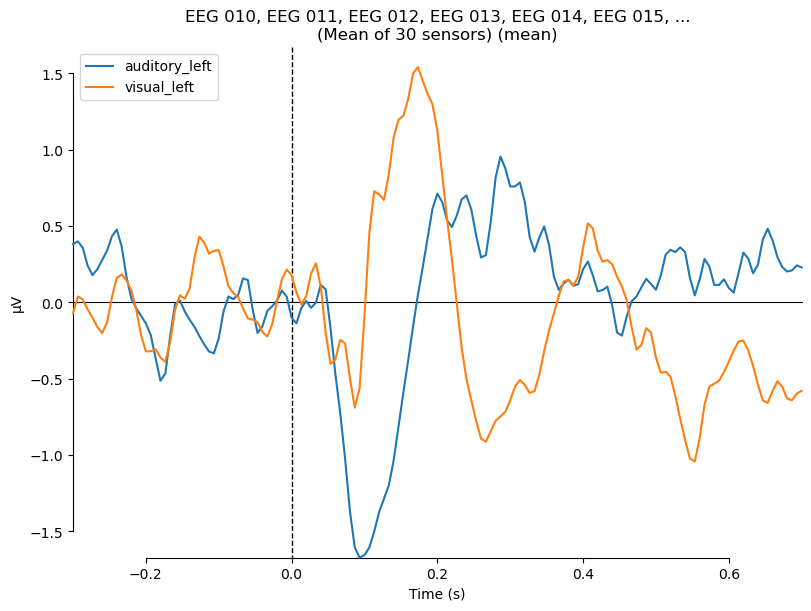

[<Figure size 800x600 with 1 Axes>]

In [21]:
# First we create a dictionary of the conditions we want to study.
# Here for example auditory (left) and visual(left). We also specify number of EEG channels 
# we want to combine by averaging. 

events_to_compare = dict(auditory_left=l_aud, visual_left=l_vis)
picks = [f'EEG 0{n}' for n in range(10, 40)]
mne.viz.plot_compare_evokeds(events_to_compare, picks=picks, combine='mean')

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


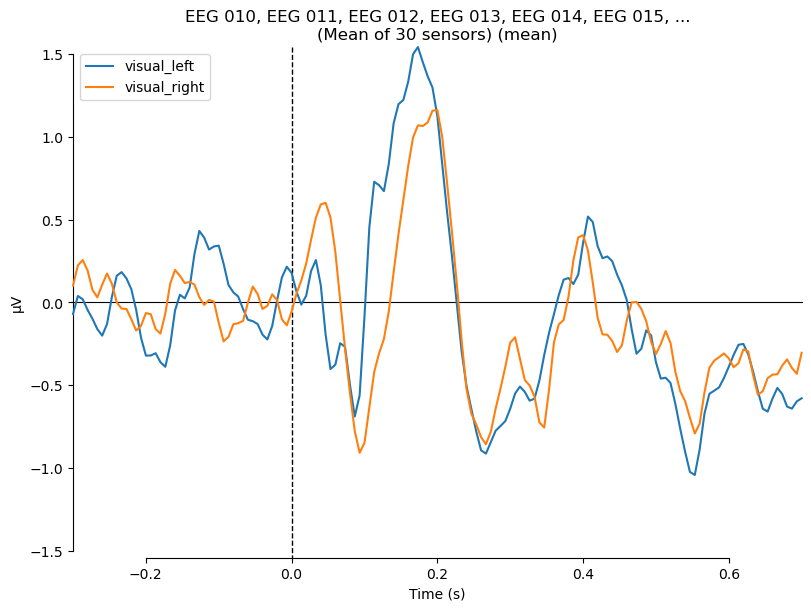

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


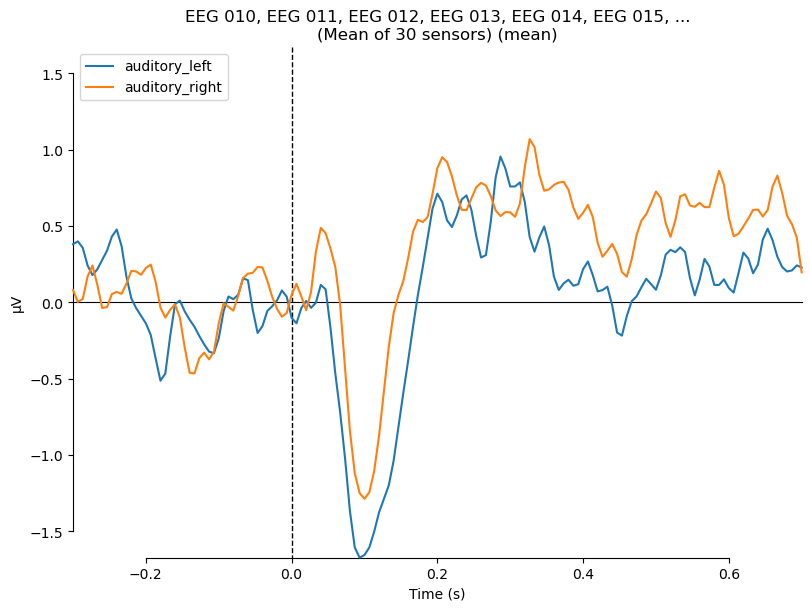

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


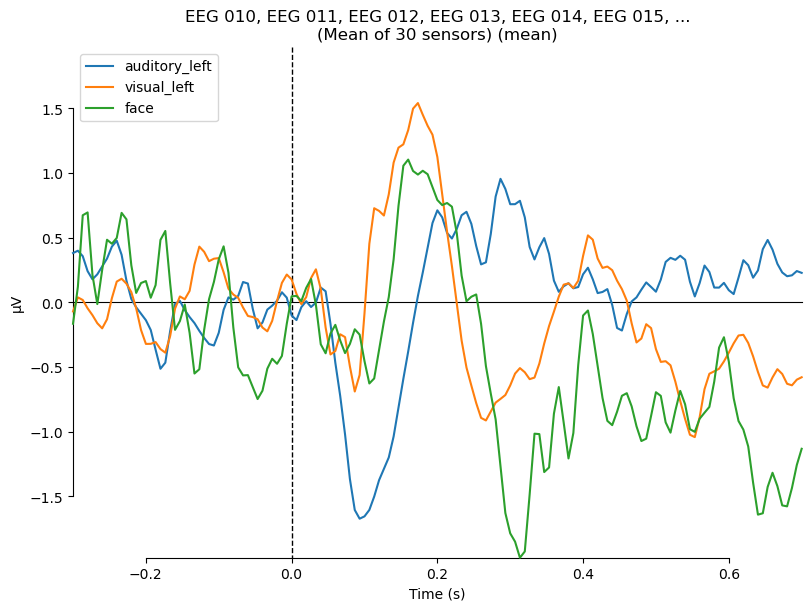

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


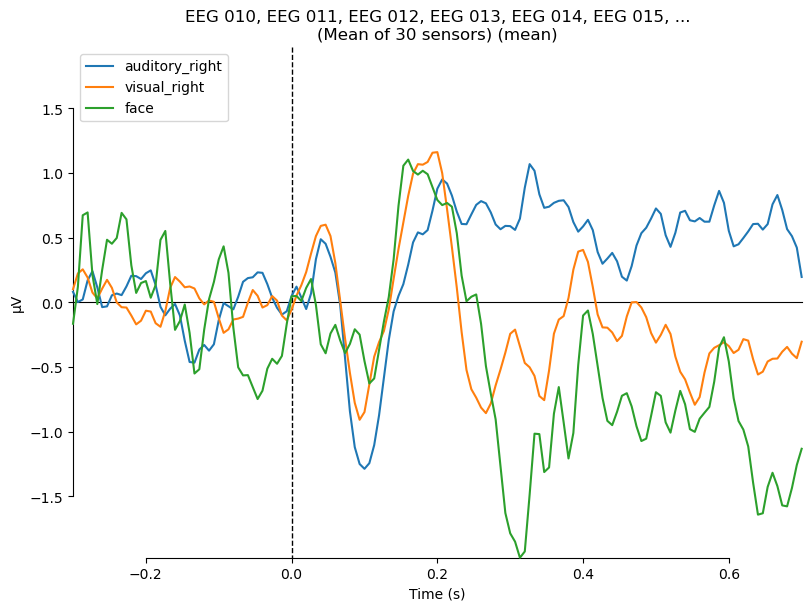

[<Figure size 800x600 with 1 Axes>]

In [24]:
# Exercise-1
# Following the same comparison as above, plot and compare the following conditions
# (1) left visual vs. right visual 
# (2) left auditory vs. right auditory
# (3) left auditory, left visual, and faces
# (4) right auditory, right visual, and faces
#
# Note- Use 30 EEG channels and use the combining metric as mean. Also, just for your understanding, 
# attempt to identify the ERP waveforms associated to each of the comparisons. Good time to revisit the 
# research article mentioned above on ERP overview.

### YOUR CODE
events_to_compare = dict(visual_left=l_vis, visual_right=r_vis)
picks = [f'EEG 0{n}' for n in range(10, 40)]
mne.viz.plot_compare_evokeds(events_to_compare, picks=picks, combine='mean')

events_to_compare = dict(auditory_left=l_aud, auditory_right=r_aud)
picks = [f'EEG 0{n}' for n in range(10, 40)]
mne.viz.plot_compare_evokeds(events_to_compare, picks=picks, combine='mean')

events_to_compare = dict(auditory_left=l_aud, visual_left=l_vis, face= face)
picks = [f'EEG 0{n}' for n in range(10, 40)]
mne.viz.plot_compare_evokeds(events_to_compare, picks=picks, combine='mean')

events_to_compare = dict(auditory_right=r_aud, visual_right=r_vis, face= face)
picks = [f'EEG 0{n}' for n in range(10, 40)]
mne.viz.plot_compare_evokeds(events_to_compare, picks=picks, combine='mean')

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b> Power Spectral Density (PSD)  </b></p>
<p style='text-indent: 0px;'><font size = "3">As you know from your lecture notes, Power Spectral Density (PSD) is the measure of signal's power content versus frequency. In M/EEG data, PSD is typically used to characterize the spectral content (i.e. frequency-related information) present in the data. It is a useful measure to identify frequencies of interest, noise, and artifacts present in our data </font>
<br>
<p style='text-indent: 0px;'><font size = "3"> Let's use the in-built MNE functions for computing and visualizing the PSD plots of the MEG and EEG data.</font>

<font size = "3">Have a look at the plot_psd() documentation <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_psd" target="_blank">here</a></p></font>
</p></span>
</div>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


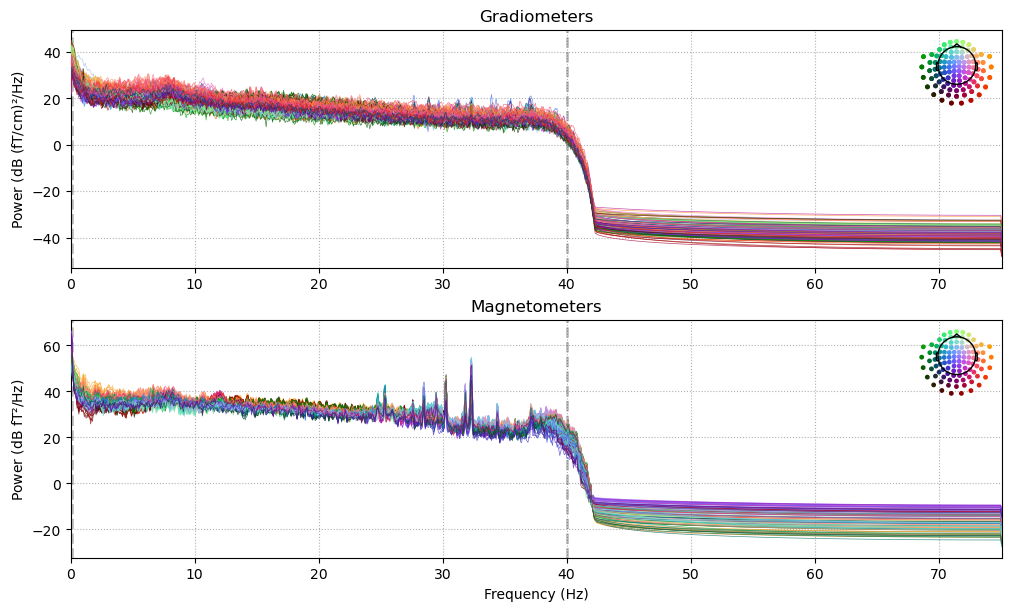

In [25]:
# PSD plot of MEG data (Gradiometer and Magnetometer, all channels, default parameters)
meg_only.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


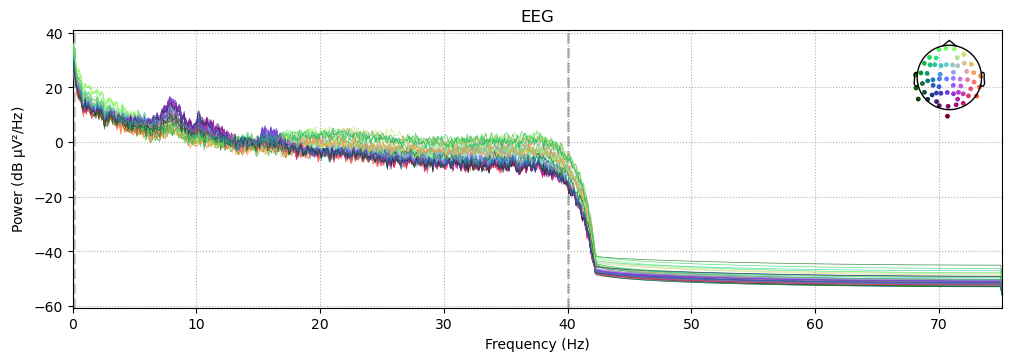

In [26]:
# PSD plot of EEG data (all channels, default parameters)
eeg_only.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


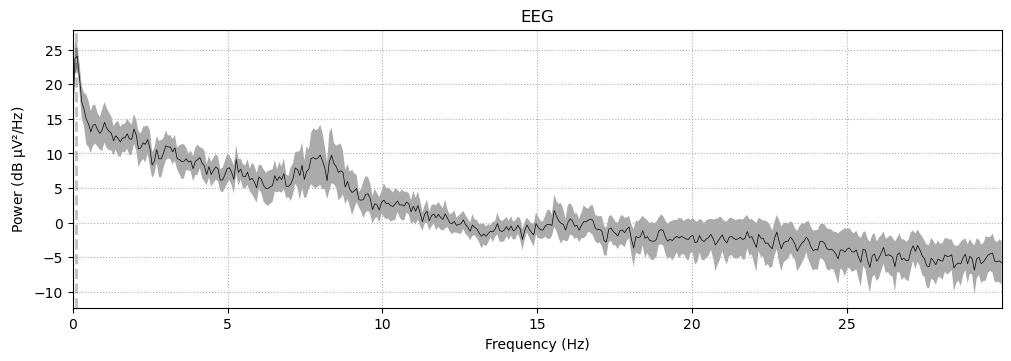

In [27]:
# Compute and plot the average PSD across all the channels for the first 200 seconds of data and 
# in the frequency range of 0 to 30 hz. 

# Check the documentation of MNE's plot_psd() function and utilize the correct arguments to visulize your results

### YOUR CODE
eeg_only.plot_psd(tmin=1, tmax=200, fmin =0, fmax=30, average ='mean')

<div class="warning" style='background-color:#C1ECFA; color: #112A46; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='text-indent: 0px;'><font size = "3">With the help of PSD plots, we know the frequency domain representation of the sample M/EEG dataset. Let us know visualize the same for our epoched dataset (only EEG data).  </font>
<br>
</span>
</div>

    Using multitaper spectrum estimation with 7 DPSS windows
<Power Spectrum (from Epochs, multitaper method) | 176 epochs × 60 channels × 61 freqs, 0.0-59.7 Hz>
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


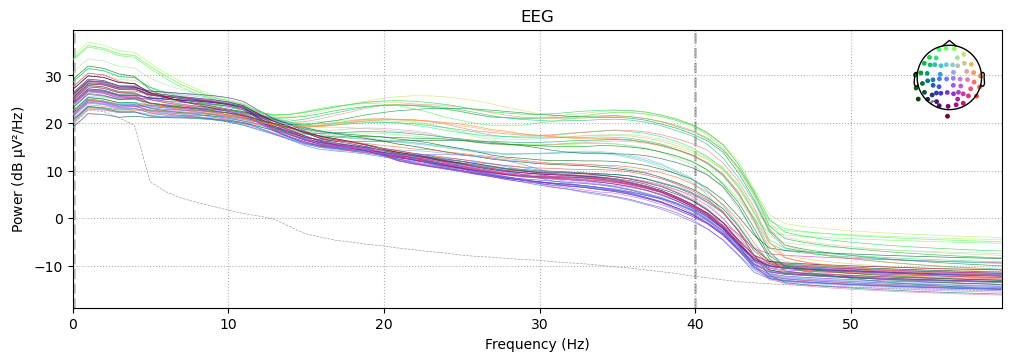

In [28]:
# Using the already created epochs object from previous part with the compute_psd() function with frequency 
# range of 0-60 Hz.
epo_spectrum = epochs.compute_psd(fmin=0, fmax=60)

# Print the epoch information (# epochs x  # channels x # frequencies)
print(epo_spectrum)

# Plot the power spectra plot of the epoch object
epo_spectrum.plot()

<Evoked | 'auditory/left' (average, N=41), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


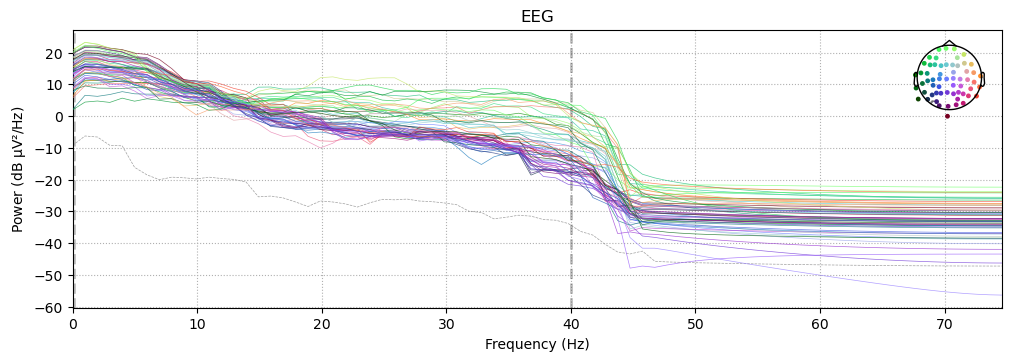

In [29]:
# Now for a specific stimuli (for example auditory(left))

# Extract auditory (left) epochs from the already computed epochs data object.
evoked_auditory = epochs['auditory/left'].average()

# Print the information of the extracted epochs for auditory (left) stimulus 
print(evoked_auditory)

# Compute the PSD for the extracted epochs 
evoked_auditory_spectrum = evoked_auditory.compute_psd()

# Plot the power spectra plot
evoked_auditory_spectrum.plot()

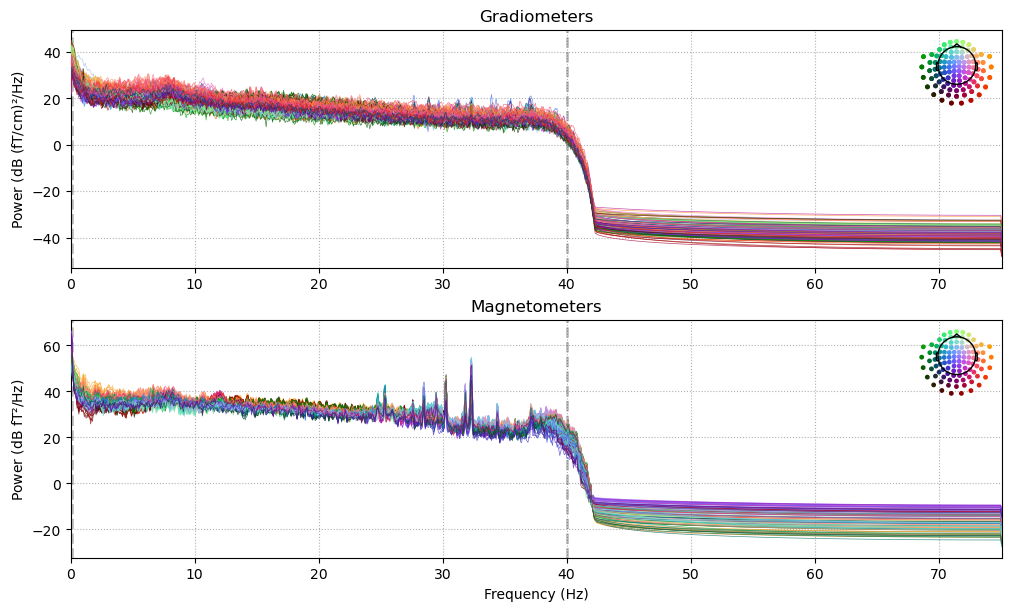

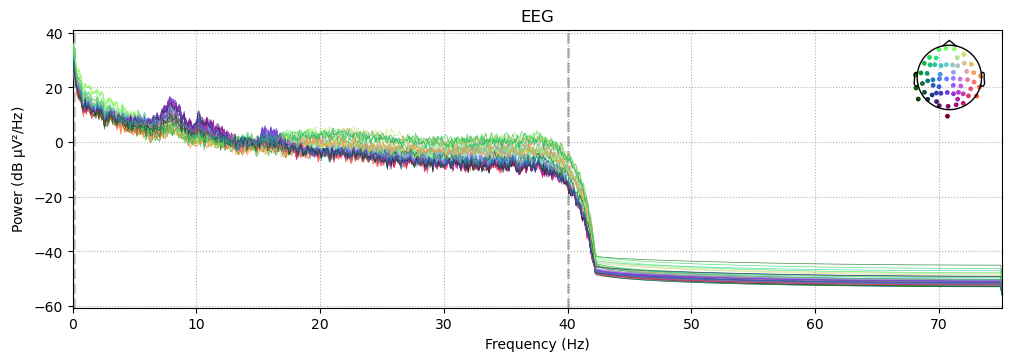

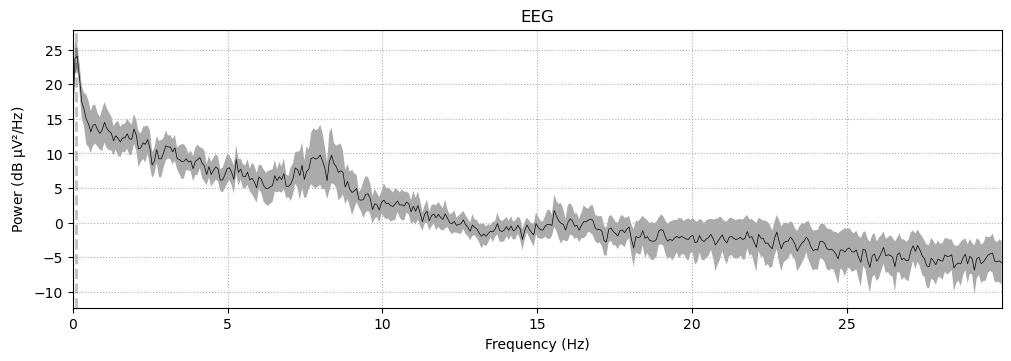

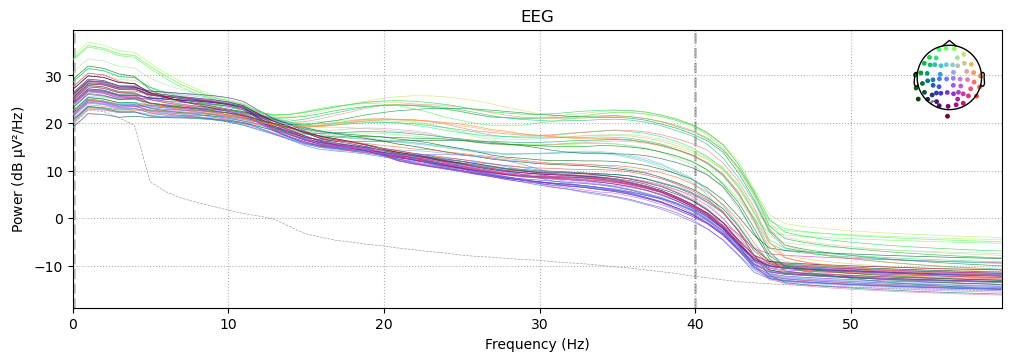

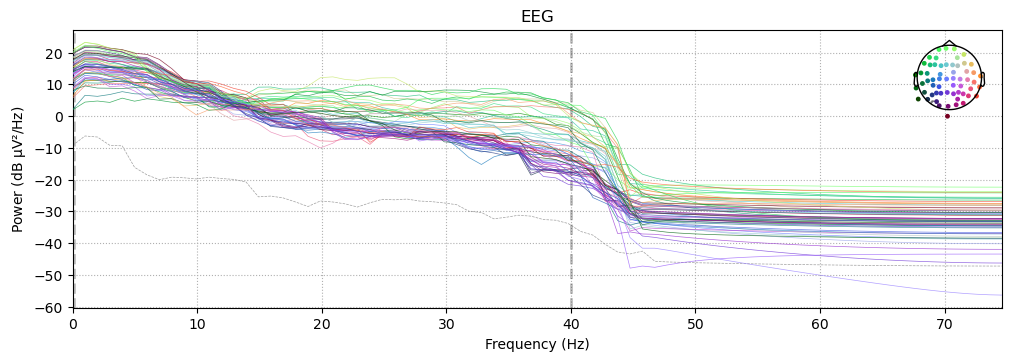

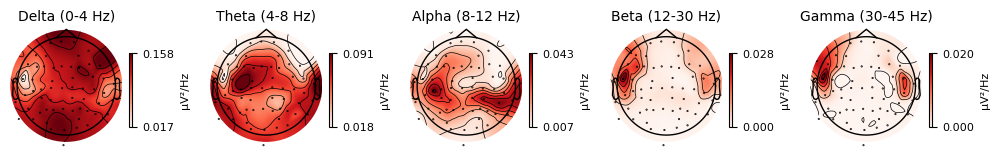

In [30]:
# We can also visualize the interpolated scalp topography of power specific to a stimuli, in all frequency bands.
# Specifying frequency bands

bands = {'Delta (0-4 Hz)': (0, 4), 'Theta (4-8 Hz)': (4, 8), 'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-45 Hz)': (30, 45)};
plt.ion()
evoked_auditory_spectrum.plot_topomap(bands = bands, ch_type='eeg', normalize=True, agg_fun=np.median)
plt.ioff()

<Evoked | 'visual/left' (average, N=40), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


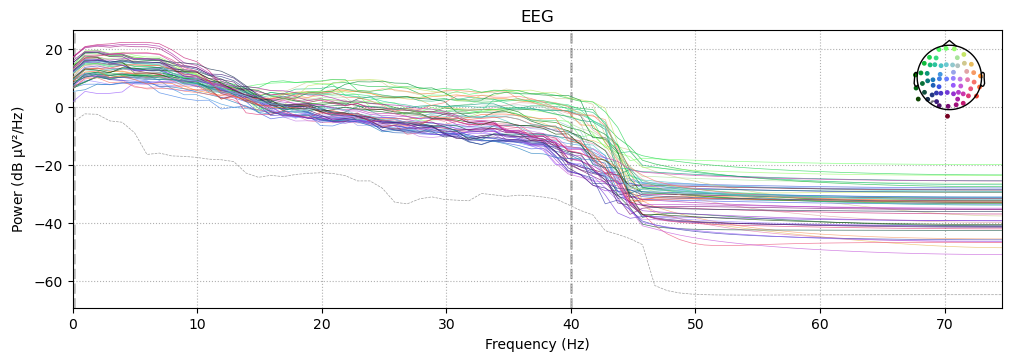

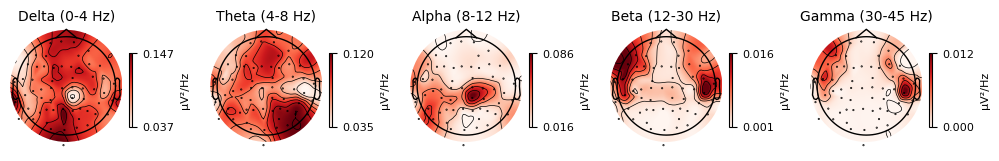

<Evoked | 'visual/right' (average, N=39), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


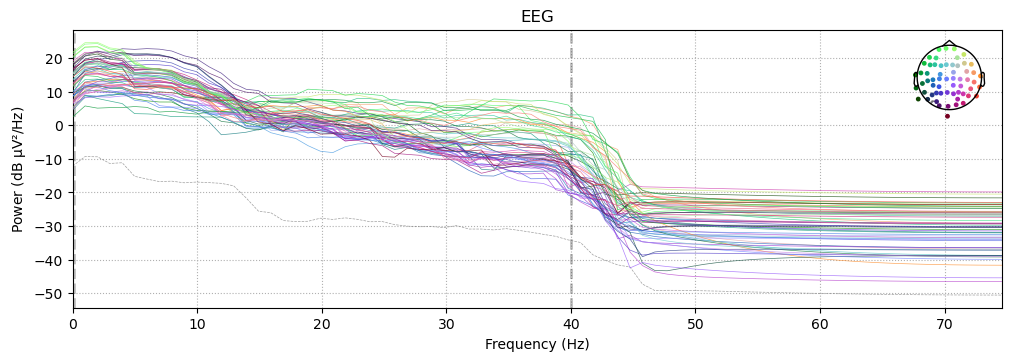

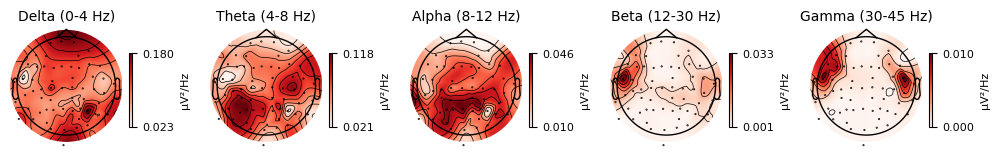

<Evoked | 'face' (average, N=8), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


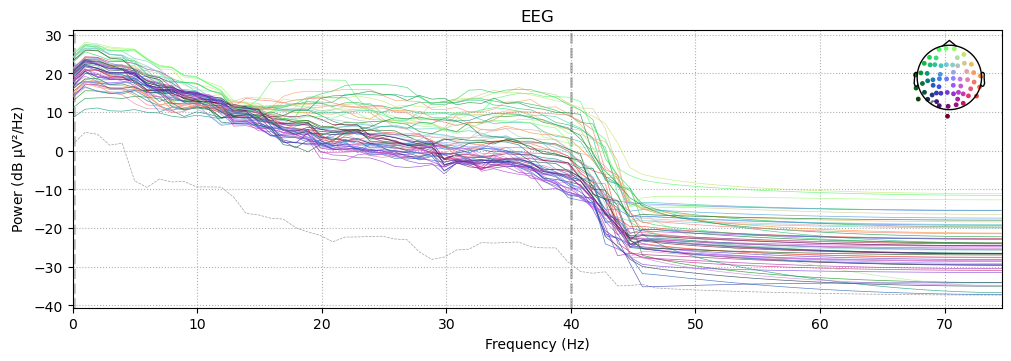

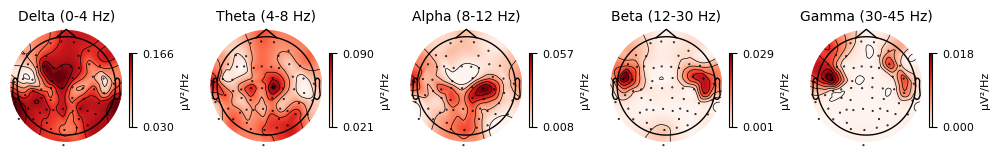

In [36]:
# Exercise-2
# Following the above, compute the evoked spectrum and plot the scalp topography of all the stimulus conditions i.e. 
# (1) visual stimulus (left and right), 
# (2) auditory stimulus (left and right), and 
# (3) face stimulus
# 
# Follow the above example for auditory (left) 
### YOUR CODE
# SOLUTION
# For example: Face stimulus (simillarly for others)

evoked_visual_l = epochs['visual/left'].average(); print(evoked_visual_l)
evoked_visual_l_spectrum = evoked_visual_l.compute_psd()
evoked_visual_l_spectrum.plot()
plt.ion()
evoked_visual_l_spectrum.plot_topomap(bands = bands, ch_type='eeg', normalize=True, agg_fun=np.median)
plt.ioff()

evoked_visual_r = epochs['visual/right'].average(); print(evoked_visual_r)
evoked_visual_r_spectrum = evoked_visual_r.compute_psd()
evoked_visual_r_spectrum.plot()
plt.ion()
evoked_visual_r_spectrum.plot_topomap(bands = bands, ch_type='eeg', normalize=True, agg_fun=np.median)
plt.ioff()

evoked_face = epochs['face'].average(); print(evoked_face)
evoked_face_spectrum = evoked_face.compute_psd()
evoked_face_spectrum.plot()
plt.ion()
evoked_face_spectrum.plot_topomap(bands = bands, ch_type='eeg', normalize=True, agg_fun=np.median)
plt.ioff()